In [2]:
#main libraries
import os
import re
import pickle
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode


In [3]:
train_df = pd.read_csv("Data/train.csv")
test_df  = pd.read_csv("Data/test.csv")

In [4]:
full_df = pd.concat([train_df,test_df])

    #make a copy of the original data
train_df_orig = train_df.copy()
test_df_orig = test_df.copy()
    

In [66]:
print(len(test_df))

418


In [65]:
print(len(train_df))

891


In [6]:
#describe our data
train_df[train_df.select_dtypes(exclude='object').columns].drop('PassengerId',axis=1).describe().\
style.background_gradient(axis=1,cmap=sns.light_palette('lightblue', as_cmap=True))

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


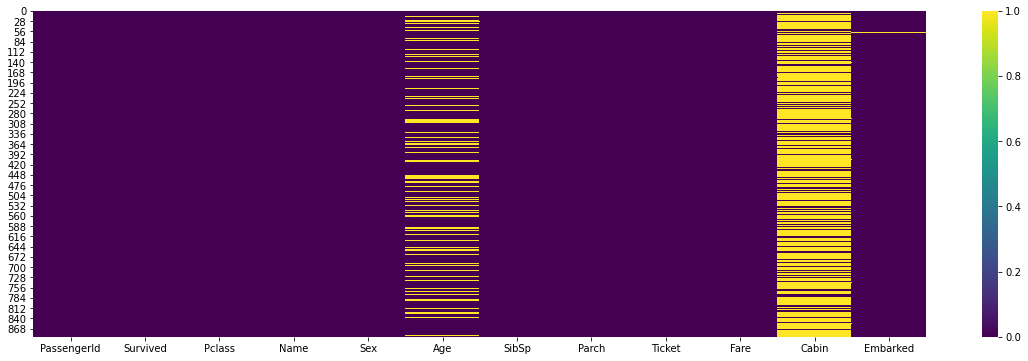

In [7]:
#visuaize the null values in each column
plt.figure(figsize=(20,6));
sns.heatmap(train_df.isnull(), cmap='viridis');

In [8]:
# survived and died
len(train_df[train_df['Survived'] ==1])/len(train_df)*100

38.38383838383838

In [9]:
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#lets see the correlation between columns and target column
corr = train_df.corr()
corr.style.background_gradient(axis=1,cmap=sns.light_palette('green', as_cmap=True))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
#number of na's 

print(len(train_df['Pclass'][train_df['Age'].isna()]))

print(len(train_df['Pclass'][train_df['Cabin'].isna()]))

print(len(train_df['Pclass'][train_df['Embarked'].isna()]))

177
687
2


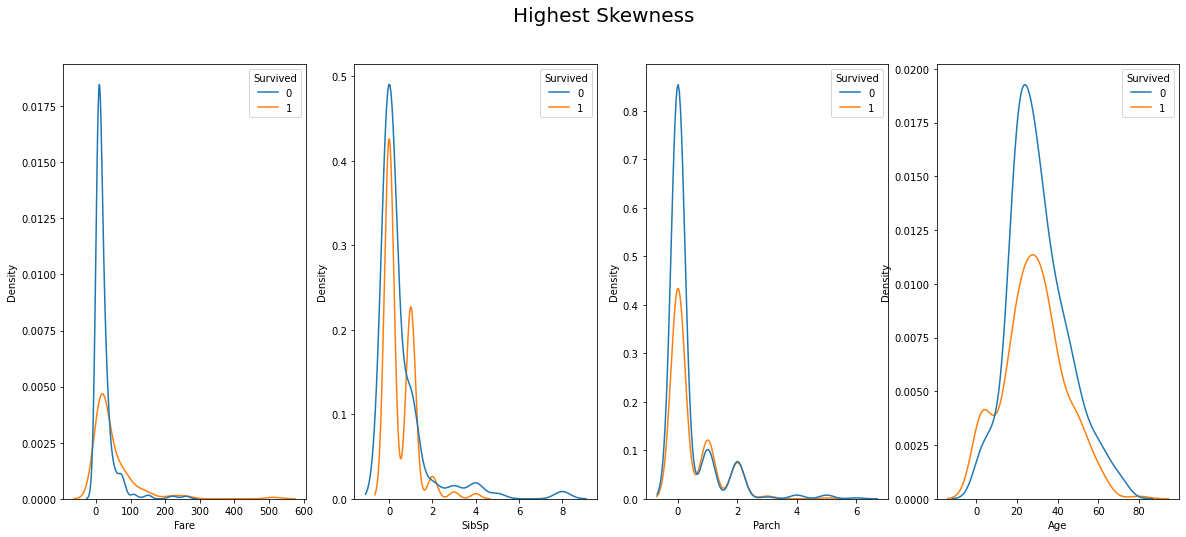

In [12]:
#Visualize columns have highest Skewness
fig, axes = plt.subplots(1,4, figsize=(20, 8));
fig.suptitle('Highest Skewness', fontsize=20);

sns.kdeplot(train_df['Age'], ax=axes[3],hue=train_df['Survived']);
sns.kdeplot(train_df['Fare'], ax=axes[0],hue=train_df['Survived']);
sns.kdeplot(train_df['SibSp'], ax=axes[1],hue=train_df['Survived']);
sns.kdeplot(train_df['Parch'], ax=axes[2],hue=train_df['Survived']);

GENDER

In [13]:
# Number of women survived
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


<h2> Age, sex and class </h2>

You have more chance of surviving if you are female also the higher classes have a higher chance of surviving

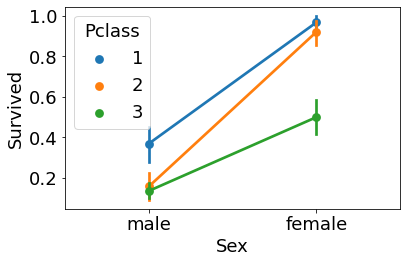

In [49]:

sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=train_df)
plt.tight_layout()
plt.savefig('Sex_class.pdf')


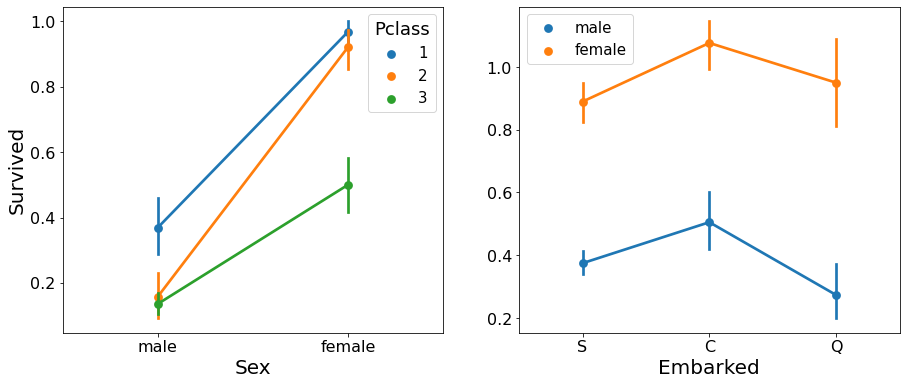

In [30]:

fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=train_df, ax= ax[0])
sns.pointplot(x="Embarked", y="Survived", hue="Sex", data=train_df, ax=ax[1])

ax[0].set_xlabel('Sex',fontsize=20);
ax[0].set_ylabel('Survived',fontsize=20);

ax[1].set_xlabel('Embarked',fontsize=20);
ax[1].set_ylabel('',fontsize=1);

ax[0].legend(title='Pclass',fontsize=15)
ax[1].legend(fontsize=15)

ax[0].set_xticklabels(['male', 'female'], fontsize=16)
ax[1].set_xticklabels(['S', 'C', 'Q'], fontsize=16)
ax[0].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16)
ax[1].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=16)

plt.savefig('sex,gender,embarked.pdf')

AGE

In [15]:
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df  = train_df['Pclass'][train_df['Age'].isna()]

In [17]:
len(df)

177

In [18]:
df.value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [19]:
df  = test_df['Pclass'][train_df['Age'].isna()]

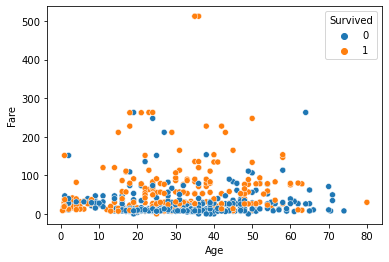

In [20]:
sns.scatterplot(x="Age", y = "Fare", hue='Survived', data=train_df)

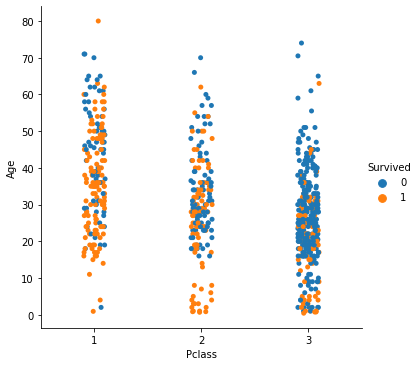

In [21]:
sns.catplot(x="Pclass", y = "Age", hue='Survived', data=train_df)

<h2> Class

You have a higher chance of surviving if you have a first class ticket than having a second or third

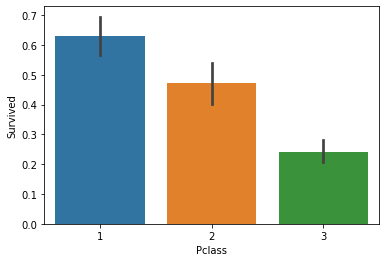

In [22]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

<h2> Embark

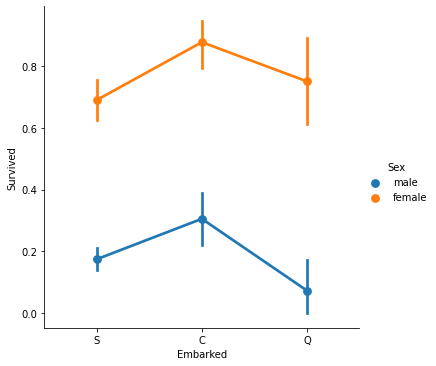

In [23]:
sns.catplot(x="Embarked", y="Survived", hue="Sex", kind="point", data=train_df)

<h2>  Relatives


You are more likly to survive if you are travels with 1 to 3 people and if you have 0 or more than three you have a less chance.

C:\Users\Gebruiker\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

C:\Users\Gebruiker\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



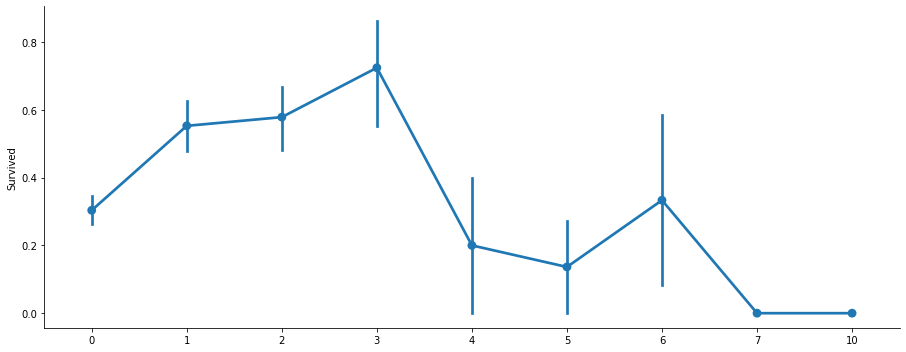

In [24]:
fam = train_df['SibSp'] + train_df['Parch']
axes = sns.factorplot(fam,'Survived', 
                      data=train_df, aspect = 2.5, );

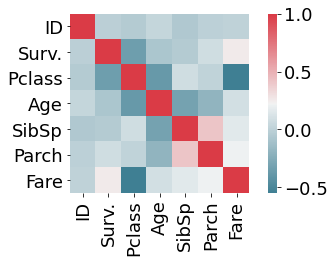

In [64]:
import seaborn as sns

#train_df = train_df.drop(columns='family')
#f, ax = plt.subplots(figsize=(16, 15))
fig, ax = plt.subplots()
corr = train_df.corr()
fig = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax = ax)

ax.set_xticklabels(['ID',"Surv.", 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] , fontsize=18)

ax.set_yticklabels(['ID',"Surv.", 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] , fontsize=18)
plt.tight_layout()
plt.savefig('titancorr.pdf')

C:\Users\Gebruiker\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



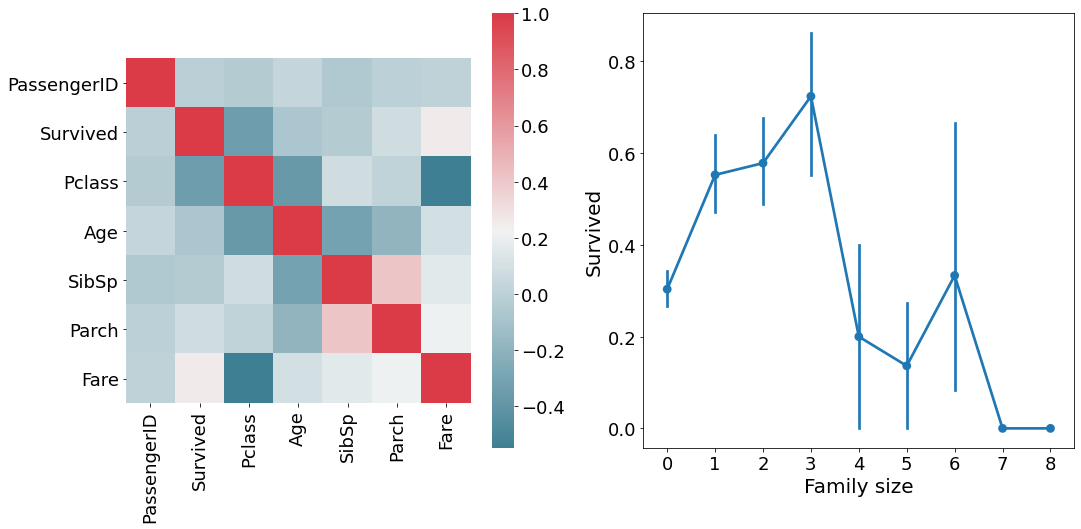

In [29]:

fig, ax = plt.subplots(1, 2, figsize=(17,8))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0])
sns.pointplot(fam,'Survived', 
                      data=train_df, aspect = 2.5, ax=ax[1]);

#ax[0].set_xlabel('hi',fontsize=20);
#ax[0].set_ylabel('Survived',fontsize=20);

ax[1].set_xlabel('Family size',fontsize=20);
ax[1].set_ylabel('Survived',fontsize=20);

#ax[0].legend(title='Pclass',fontsize=15)
#ax[1].legend(fontsize=15)

ax[0].set_xticklabels(['PassengerID',"Survived", 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] , fontsize=18)

ax[0].set_yticklabels(['PassengerID',"Survived", 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] , fontsize=18)
ax[1].set_xticklabels(range(0,10), fontsize=18)
ax[1].set_yticklabels(np.round(ax[1].get_yticks(),2),fontsize=18)


plt.savefig('correlation.pdf')

In [ ]:
ax[0].get_xticks()


In [ ]:
data = pd.read_excel(r'C:\Users\Gebruiker\OneDrive\Computational_Science\Year1_Semester2_Block2\Data mining\Assignment1\DataMining\Ass 1 - basic\Data\ODI-2021.xlsx')

In [ ]:
df = data

In [ ]:
new_cols = ["Time", "Programme", "ML", "IR", "Stat", "DB","Gender","Chocolate","Birthday","Neighbours", "Stand up", "Stress", "Self esteem", "RN", "Bedtime","GD1", "GD2"]

def rename_collumns(df, new_collumns):
    for i, col in enumerate(df.columns):
        df = df.rename(columns={col: new_collumns[i]})
    return df


    
def stress_cleaner(df):
    df["Stress_c"] = df["Stress"]
    
    for i in df["Stress"]:
        if str(i).isdigit():
            if float(i) > 100 :
                df["Stress_c"] = df["Stress_c"].replace(i,'100')
        else:
            df["Stress_c"] = df["Stress_c"].replace(i,'100')


    df["Stress_c"] = pd.to_numeric(df["Stress_c"], errors='coerce', downcast='integer')
        
    return df

def se_cleaner(df):
    df["Self esteem_c"] = df["Self esteem"]
    for i in df["Self esteem"]:
            if str(i).isdigit():
                if float(i) > 100 :
                    df["Self esteem_c"] = df["Self esteem_c"].replace(i,'100')
            elif "/" in i or "cent" in i:
                df["Self esteem_c"] = df["Self esteem_c"].replace(i,'0')

            elif len(i.split()) > 1:
                for j in i.split():
                    if j.isdigit():
                        df["Self esteem_c"] = df["Self esteem_c"].replace(i,j)
            elif "," in i:
                df["Self esteem_c"] = df["Self esteem_c"].replace(i,i[0])
            elif "€" in i:
                df["Self esteem_c"] = df["Self esteem_c"].replace(i,i[1])
            
            if "More" in i or "%" in i or "Win" in i or "Twice" in i or "All" in i or "BTC" in i or "1.000.000" in i:
                df["Self esteem_c"] = df["Self esteem_c"].replace(i,"100")

            if "equally" in i or "Depends" in i or "depends" in i or "less" in i or "not" in i or "None" in i or "-1" in i:
                df["Self esteem_c"] = df["Self esteem_c"].replace(i,"0")
            if "enough" in i:
                df["Self esteem_c"] = df["Self esteem_c"].replace(i,"100")
            
    df["Self esteem_c"] = pd.to_numeric(df["Self esteem_c"], errors='coerce', downcast='integer')

    return df

    

In [ ]:
    new_cols = ["Time", "Programme", "ML", "IR", "Stat", "DB","Gender","Chocolate","Birthday","Neighbours", "Stand up", "Stress", "Self esteem", "RN", "Bedtime","GD1", "GD2"]
    
    
    df = rename_collumns(df,new_cols)
    df = stress_cleaner(df)
    df = se_cleaner(df)
    df = df.dropna()

In [26]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})